## Introduction

CitiBike's data sharing information can be found at their [System Data website](https://www.citibikenyc.com/system-data). They provide information about the data set, such as included variables and their description. The data have been pre-cleaned before uploading, for example by removing trips taken by staff and any trips below 60 seconds in length. This means the data should be ready to use with no need for additional cleaning.

The data are organized in monthly subsets (each in its own '.csv' file) and are available since July 2013, soon after citibike service started, up until October 2015 (previous month, as of this writing). Using data from one whole year is probably the most appropriate, as there may be yearly patterns. Also, this will provide a good amount of observations, enough for most analysis we may want to do. For this exercise the data for 2016 Dec was used.


In [29]:
import pandas as pd

In [2]:
bike_data = pd.read_csv('201612-citibike-tripdata.csv')

### Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

### DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table. You can also think of a DataFrame as a group of Series objects that share an index (the column names).
For the rest of the tutorial, we'll be primarily working with DataFrames.

In [3]:
bike_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1


In [17]:
bike_data.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [18]:
bike_data.dtypes

Trip Duration                int64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
dtype: object

In [19]:
bike_data.shape

(812192, 15)

In [20]:
bike_data['Start Time'].min()

'2016-12-01 00:00:04'

In [21]:
bike_data['Start Time'].max()

'2016-12-31 23:59:56'

In [22]:
bike_data['Stop Time'].min()

'2016-12-01 00:04:06'

In [23]:
bike_data['Stop Time'].max()

'2017-01-19 08:08:17'

Let's compute the number of indivudual bikes available. We can do it using function **unique()**. This function returns an array contained only distinct bike IDs. After that we can get the dimension properties of the created array.

In [46]:
bike_data['Bike ID'].unique().shape

(9481,)

Apply the same procedure to calculate the total number of bike stations

In [47]:
bike_data['Start Station ID'].unique().shape

(609,)

With Pandas we can print only one Series(column) of interest. For that purpose we pass the column name to square brackets

In [100]:
bike_data[['Start Station ID', 'Start Station Name']]

,Start Station ID,Start Station Name
0,499,Broadway & W 60 St
1,3418,Plaza St West & Flatbush Ave
2,297,E 15 St & 3 Ave
3,405,Washington St & Gansevoort St
4,279,Peck Slip & Front St
5,245,Myrtle Ave & St Edwards St
6,470,W 20 St & 8 Ave
9,496,E 16 St & 5 Ave
10,297,E 15 St & 3 Ave
11,2004,6 Ave & Broome St


Our dataset is quite big and we can print also part of rows using slice notation. The slice is defined in the same way as with Python strings and lists.

In [55]:
bike_data['Start Station Name'][:5]

0               Broadway & W 60 St
1     Plaza St West & Flatbush Ave
2                  E 15 St & 3 Ave
3    Washington St & Gansevoort St
4             Peck Slip & Front St
Name: Start Station Name, dtype: object

The **value_counts** method will tally up the number of times a value appears in a column, and will return a Series with the counts, in descending order.

In [10]:
bike_data['User Type'].value_counts()

Subscriber    774278
Customer       32526
Name: User Type, dtype: int64

In [33]:
bike_data['gender'].value_counts()

male       592839
female     171585
unknown      2676
Name: gender, dtype: int64

In [12]:
gender = {0:'unknown', 1: 'male', 2:'female'}#Zero=unknown; 1=male; 2=female.

In [19]:
bike_data['age'] = 2016 - bike_data['Birth Year']

In [13]:
bike_data['gender'] = bike_data.apply(lambda x: gender[x['Gender']], axis = 1)

To get brief statistics about numerical variables with method **describe()**

In [11]:
bike_data.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,start_time,stop_time,start_hour,start_month,stop_hour,stop_month
count,8.121920e+05,812192.000000,812192.000000,812192.000000,812192.000000,812192.000000,812192.000000,812192.000000,772488.000000,812192.000000,8.121920e+05,8.121920e+05,812192.000000,812192.0,812192.000000,812192.000000
mean,7.759573e+02,1230.658706,40.737667,-73.984587,1210.592212,40.737181,-73.984581,21949.073166,1977.099969,1.161004,1.481690e+09,1.481690e+09,13.577580,12.0,13.718379,11.998957
std,7.542199e+03,1281.955016,0.082664,0.143095,1272.932141,0.122438,0.217795,3982.457558,11.999981,0.489375,7.605314e+05,7.605812e+05,4.816329,0.0,4.841047,0.107100
min,6.100000e+01,72.000000,0.000000,-74.031372,72.000000,0.000000,-74.049968,14529.000000,1885.000000,0.000000,1.480540e+09,1.480540e+09,0.000000,12.0,0.000000,1.000000
25%,3.340000e+02,358.000000,40.721101,-73.995101,356.000000,40.720874,-73.995960,18352.000000,1969.000000,1.000000,1.481029e+09,1.481030e+09,9.000000,12.0,10.000000,12.000000
50%,5.330000e+02,482.000000,40.739445,-73.987216,480.000000,40.739355,-73.987586,22708.000000,1979.000000,1.000000,1.481615e+09,1.481616e+09,14.000000,12.0,14.000000,12.000000
75%,8.760000e+02,3096.000000,40.756014,-73.976485,3090.000000,40.755103,-73.976806,25655.000000,1987.000000,1.000000,1.482316e+09,1.482317e+09,17.000000,12.0,18.000000,12.000000
max,3.473103e+06,3440.000000,40.804213,0.000000,3440.000000,40.804213,0.000000,27342.000000,2000.000000,2.000000,1.483218e+09,1.484802e+09,23.000000,12.0,23.000000,12.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's estimate the trips duration time and visualize the distribution

In [14]:
bike_data['duration_min'] = bike_data['Trip Duration'] // 60

In [15]:
bike_data['duration_min'].min()

1

In [16]:
bike_data['duration_min'].max()

57885

In [17]:
bike_data['duration_min'].mean()

12.441666502501871

In [159]:
bike_sample = bike_data[bike_data['duration_min'] < 60]

### Bar plots
Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the plot method with a kind='bar' argument.

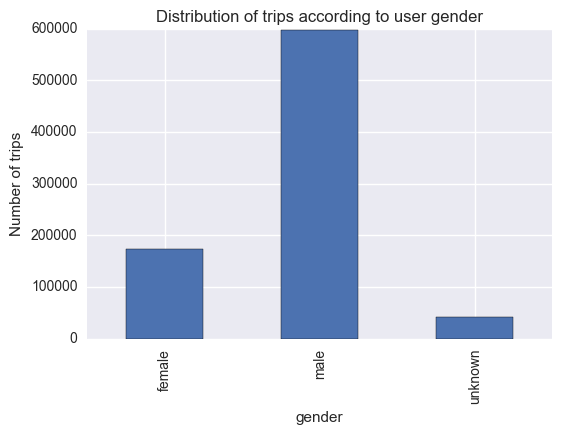

In [13]:
bike_data.groupby('gender')['gender'].count().plot(kind='bar')
plt.ylabel('Number of trips')
plt.title('Distribution of trips according to user gender')

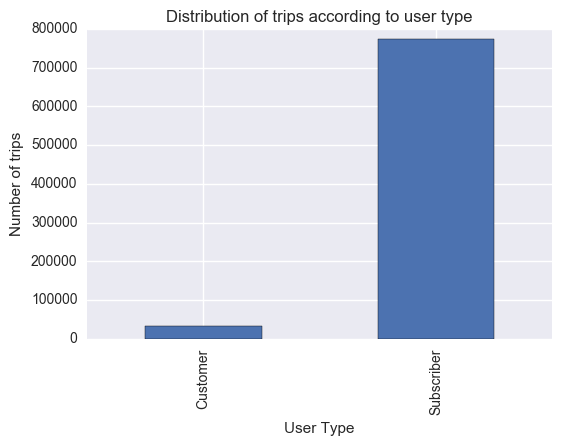

In [14]:
bike_data.groupby('User Type')['User Type'].count().plot(kind='bar')
plt.ylabel('Number of trips')
plt.title('Distribution of trips according to user type')

Bar graphs are very useful to plot the number of trips over time. The two graphs below show the different number of trips made in weekdays and weekends.

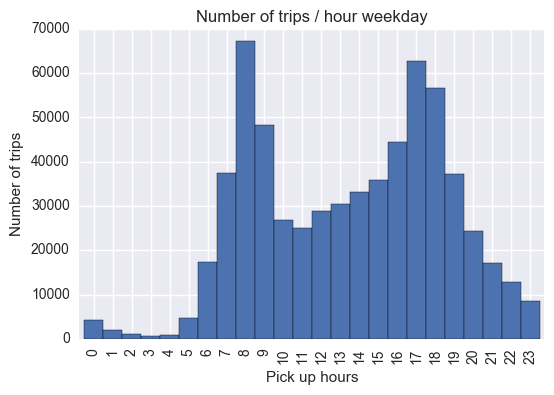

In [98]:
bike_data[bike_data.day_type == 1].groupby('start_hour').size().plot(kind='bar', width=1)
plt.xlabel('Pick up hours')
plt.ylabel('Number of trips')
plt.title('Number of trips / hour weekday')


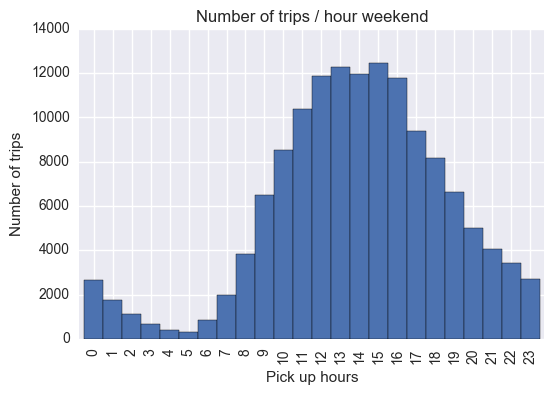

In [97]:
bike_data[bike_data.day_type == 0].groupby('start_hour').size().plot(kind='bar', width=1)
plt.xlabel('Pick up hours')
plt.ylabel('Number of trips')
plt.title('Number of trips / hour weekend')

We can observe some phenomenon directly from the data, by looking at an hourly graph of trips that travel between Manhattan and the outer boroughs:

In [121]:
bike_from_manhattan = bike_data[(bike_data['Start Station Name'].str.contains('Manhattan'))]
bike_from_manhattan = bike_from_manhattan[(bike_from_manhattan['Start Station ID'] != bike_from_manhattan['End Station ID'])]

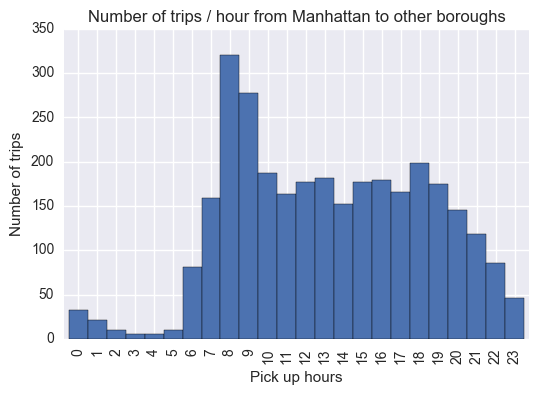

In [122]:
bike_from_manhattan.groupby('start_hour').size().plot(kind='bar', width=1)
plt.xlabel('Pick up hours')
plt.ylabel('Number of trips')
plt.title('Number of trips / hour from Manhattan to other boroughs')

In [119]:
bike_to_manhattan = bike_data[(bike_data['End Station Name'].str.contains('Manhattan'))]
bike_to_manhattan = bike_to_manhattan[(bike_to_manhattan['Start Station ID'] != bike_to_manhattan['End Station ID'])]

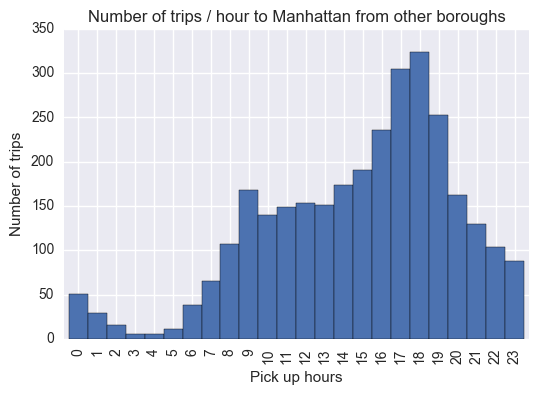

In [120]:
bike_to_manhattan.groupby('start_hour').size().plot(kind='bar', width=1)
plt.xlabel('Pick up hours')
plt.ylabel('Number of trips')
plt.title('Number of trips / hour to Manhattan from other boroughs')

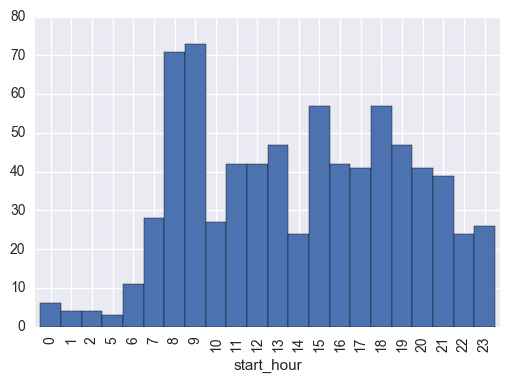

In [143]:
station = 'Lafayette Ave & Fort Greene Pl'
bike_data[bike_data['Start Station Name'] == station].groupby('start_hour')['Bike ID'].count().plot(kind='bar', width=1)

### Histograms

Frequenfly it is useful to look at the distribution of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

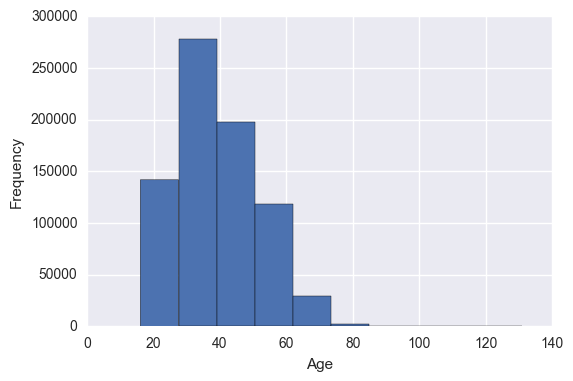

In [51]:
bike_data['age'].plot(kind='hist')
plt.xlabel('Age')

The hist method puts the continuous agw values into bins, trying to make a sensible decision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

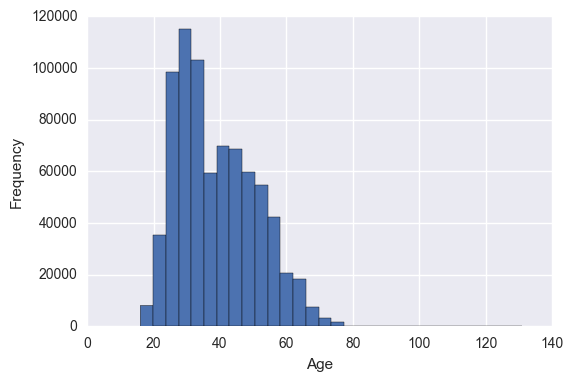

In [79]:
bike_data['age'].plot(kind='hist', bins=30)
plt.xlabel('Age')

A density plot is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an estimate of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the plot method with kind='kde', where kde stands for kernel density estimate.

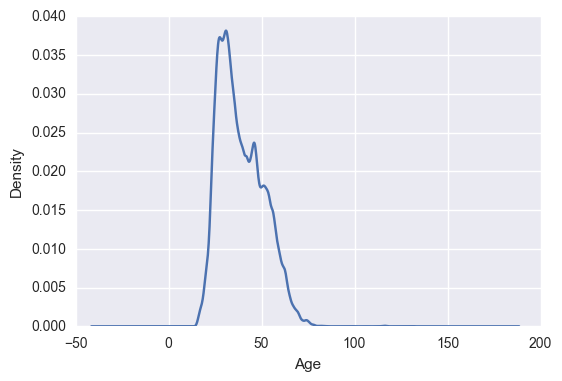

In [148]:
bike_data['age'].plot(kind='kde')
plt.xlabel('Age')

Often, histograms and density plots are shown together:

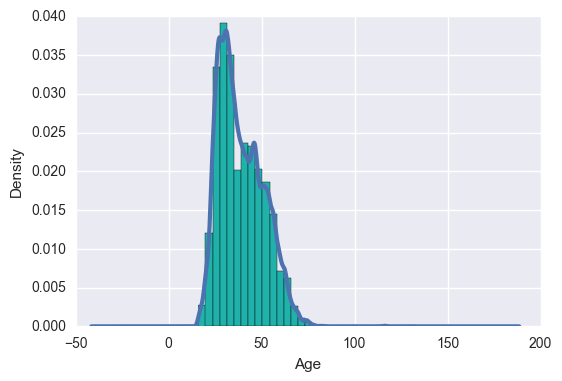

In [153]:
bike_data['age'].hist(bins=30, normed=True, color='lightseagreen')
bike_data['age'].plot(kind='kde', linewidth=3)
plt.xlabel('Age')

Here, we had to normalize the histogram (normed=True), since the kernel density is normalized by definition (it is a probability distribution).
We will explore kernel density estimates more in the next section.

Now let's plot the histogram of travel time

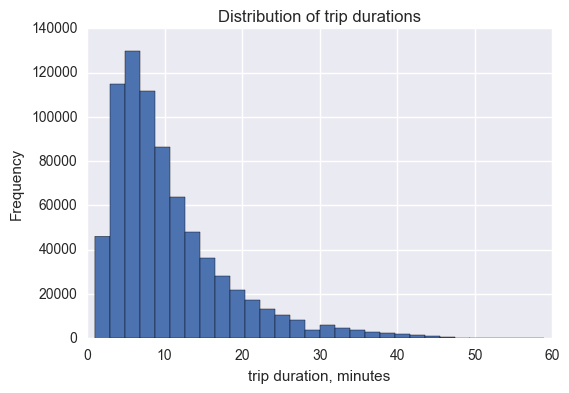

In [160]:
bike_sample['duration_min'].plot(kind='hist', bins=30)
plt.xlabel('trip duration, minutes')
plt.title('Distribution of trip durations')

### Boxplots
A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

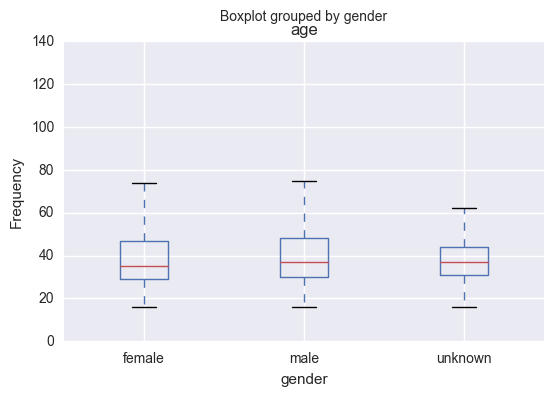

In [161]:
bike_data.boxplot(column='age', by='gender')
plt.ylabel('Frequency')

### Scatter plots

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are two ways for visualization - scatterplot methods for Series or DataFrame objects or instead use the matplotlib function scatter.

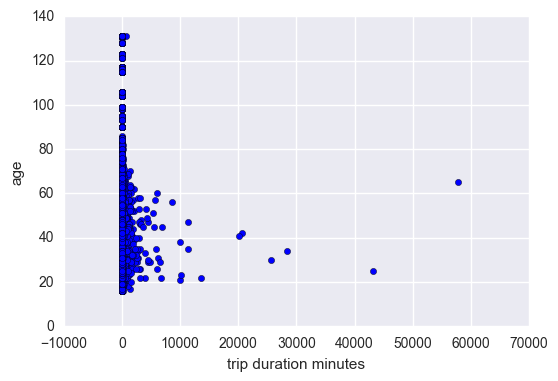

In [123]:
plt.scatter(bike_data['duration_min'], bike_data['age'])
plt.ylabel('age')
plt.xlabel('trip duration minutes')

There is corr() method to calculate the correlation between variables 

In [156]:
bike_data[['duration_min', 'age']].corr()

,duration_min,age
duration_min,1.000000,0.005175
age,0.005175,1.000000


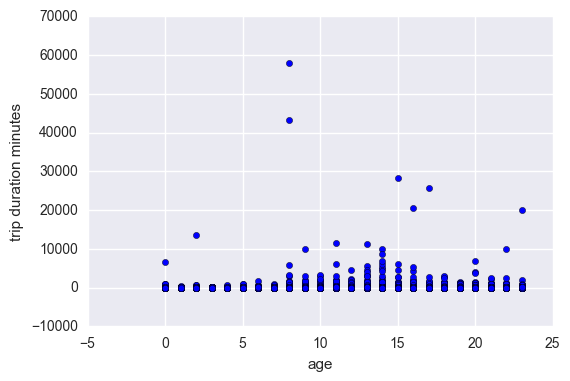

In [57]:
plt.scatter(bike_data['start_hour'], bike_data['duration_min'])
plt.xlabel('age')
plt.ylabel('trip duration minutes')